In [2]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import multiprocessing as mp
from itertools import repeat

from tfspline import model, parallel, plot, sampledata, animate

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Done.


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
learning_rate = 0.1
shift_polynomial_centers = 'mean' # Power and Chebyshev Basis
shift_polynomial_centers_sc = 'boundary' # Shifted Chebyshev Basis
ck = 2
degree = 5
lambd = 0.9
factor_approx = lambd
factor_ck = 1-lambd

colors = list(mcolors.TABLEAU_COLORS.keys())

In [4]:
def get_optimizer(basis='', optimizer='', lambd=1, learning_rate=0.1):
    if optimizer == 'sgd':
        if basis == 'power':
            opt = keras.optimizers.SGD(momentum=0.95, learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(momentum=0.9, learning_rate=learning_rate)
    else:
        #opt = keras.optimizers.Adam(amsgrad=True, learning_rate=learning_rate, beta_1=0.8)
        opt = keras.optimizers.Adam(amsgrad=True, learning_rate=learning_rate)  
    return opt

## Data

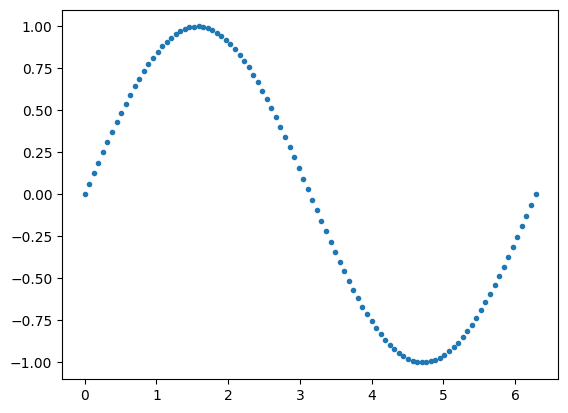

In [5]:
xsin = np.linspace(0, 2*np.pi, 100)
ysin = np.sin(xsin)

plt.plot(xsin, ysin, '.')

Text(0.5, 1.0, 'Scaled to range [0, 10] for 10 polynomial segments')

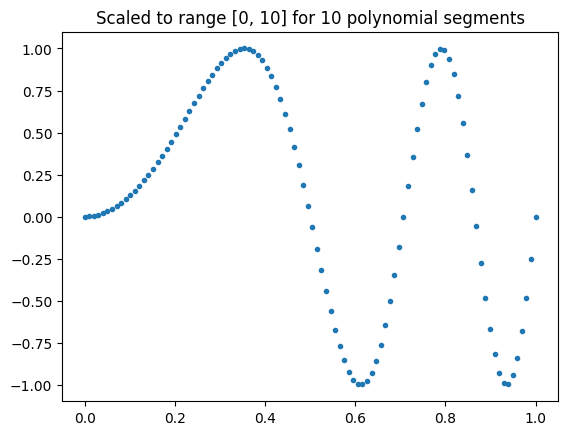

In [5]:
xsinvar = np.linspace(0, 1, 100)
ysinvar = np.sin(xsinvar**2 * 4 * np.pi)

plt.plot(xsinvar, ysinvar, '.')
plt.title('Scaled to range [0, 10] for 10 polynomial segments')

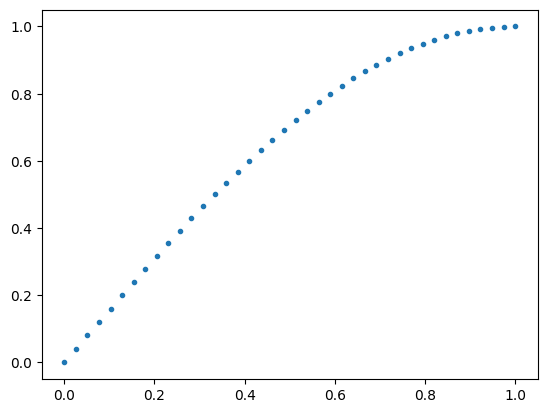

In [7]:
xss_ori = np.linspace(0, 0.5*np.pi, 100, dtype="double")

xss = sampledata.rescale_input_data(xss_ori, 1)
# The data set to approximate with x and y samples
xs_ori = np.linspace(xss_ori[0], xss_ori[-1], 20)
ys = np.array(np.sin(xs_ori))
#plt.plot(xs_ori, ys, '.')
xs = sampledata.rescale_input_data(xs_ori, 1)

xs2_ori = np.linspace(0, 0.5*np.pi, 40)
ys2 = np.sin(xs2_ori)
#plt.plot(xs2_ori, ys2, '.')
xs2 = sampledata.rescale_input_data(xs2_ori, 1)
plt.plot(xs2, ys2, '.')

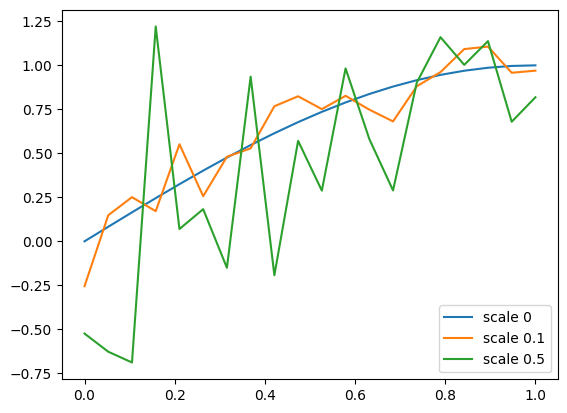

In [8]:
# Explicit seed to have reproducible testsets
np.random.seed(0)
ysgauss_scales = [0.0, 0.1, 0.5]
ysgauss = [ys + np.random.normal(scale=s, size=len(ys)) for s in ysgauss_scales]

for i, ysn in enumerate(ysgauss):
    plt.plot(xs, ysn, '-', label='scale %.2g' % ysgauss_scales[i])
plt.legend(loc="best")

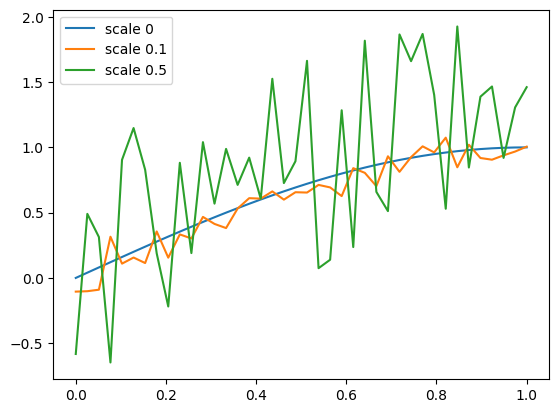

In [9]:
np.random.seed(0)
ys2gauss = [ys2 + np.random.normal(scale=s, size=len(ys2)) for s in ysgauss_scales]

for i, ysn in enumerate(ys2gauss):
    plt.plot(xs2, ysn, '-', label='scale %.2g' % ysgauss_scales[i])
plt.legend(loc="best")

## SciDataCon 2023

In [ ]:
polynum = 3
epochs = 500

In [41]:
spline_power = model.Spline(polydegree=degree, polynum=polynum, ck=ck, basis='power', continuity=False, shift_polynomial_centers=shift_polynomial_centers)
opt = get_optimizer('power', 'amsgrad', lambd, learning_rate)
spline_power.fit(xsinvar, ysinvar, optimizer=opt, n_epochs=epochs, factor_approximation_quality=factor_approx, factor_ck_pressure=factor_ck)

<tf.Tensor: shape=(), dtype=float64, numpy=0.004023891772621691>

In [39]:
spline_chebyshev = model.Spline(polydegree=6, polynum=polynum, ck=ck, basis='chebyshev', continuity=False, shift_polynomial_centers=shift_polynomial_centers)
opt = get_optimizer('chebyshev', 'amsgrad', lambd, learning_rate)
spline_chebyshev.fit(xsinvar, ysinvar, optimizer=opt, n_epochs=epochs, factor_approximation_quality=factor_approx, factor_ck_pressure=factor_ck)

<tf.Tensor: shape=(), dtype=float64, numpy=2.8857346803176127e-05>

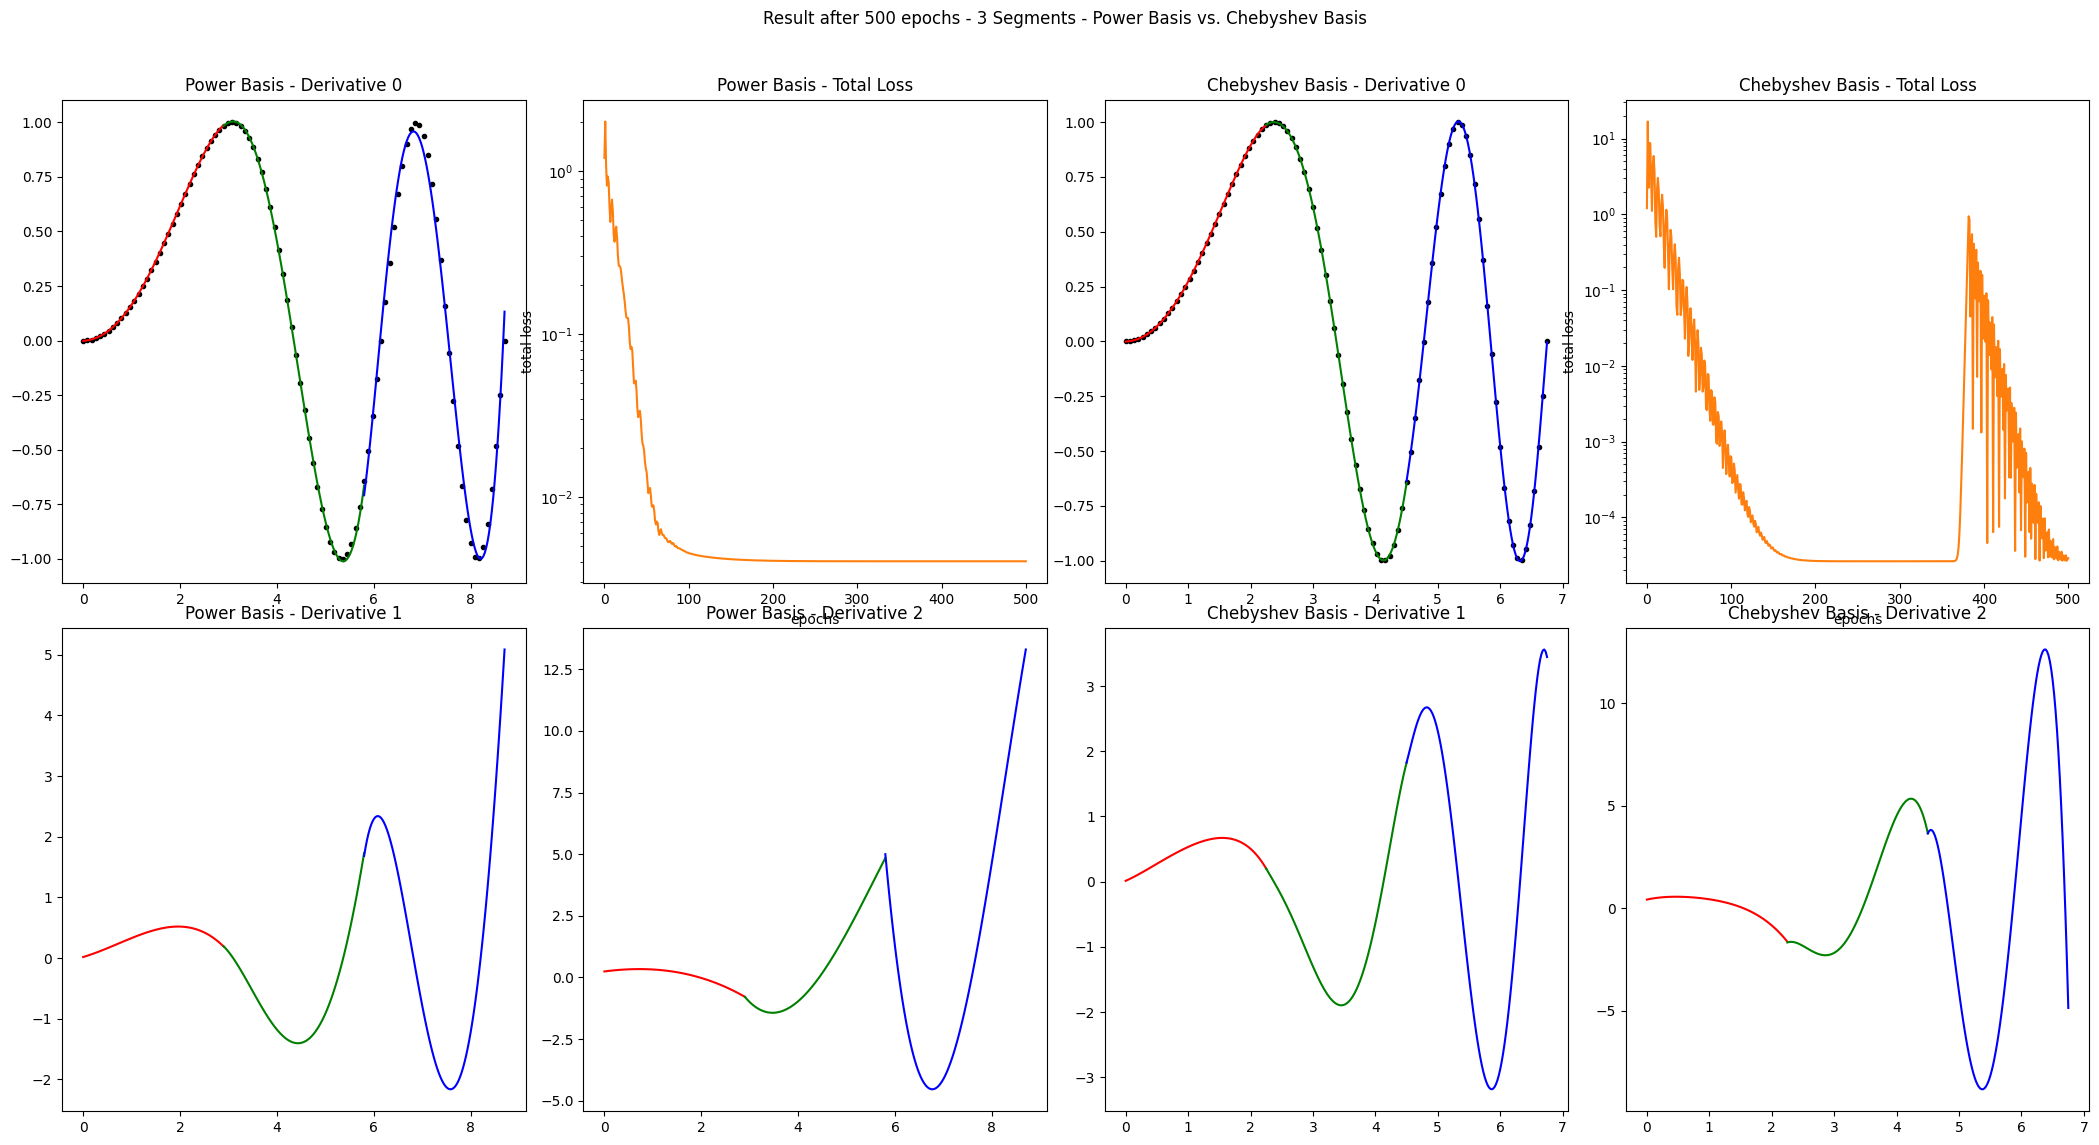

In [42]:
fig, axes = plt.subplots(2, 4)
fig.set_figwidth(21)
fig.set_figheight(12)
fig.suptitle(f'Result after {epochs} epochs - 3 Segments - Power Basis vs. Chebyshev Basis')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plot.plot_spline(spline_power, ax=axes[0][0], title=f'Power Basis - Derivative 0', deriv=0)
plot.plot_loss(spline_power, type='total', ax=axes[0][1], title=f'Power Basis - Total Loss', color=colors[1])
plot.plot_spline(spline_chebyshev, ax=axes[0][2], title=f'Chebyshev Basis - Derivative 0', deriv=0)
plot.plot_loss(spline_chebyshev, type='total', ax=axes[0][3], title=f'Chebyshev Basis - Total Loss', color=colors[1])
plot.plot_spline(spline_power, ax=axes[1][0], title=f'Power Basis - Derivative 1', deriv=1)
plot.plot_spline(spline_power, ax=axes[1][1], title=f'Power Basis - Derivative 2', deriv=2)
plot.plot_spline(spline_chebyshev, ax=axes[1][2], title=f'Chebyshev Basis - Derivative 1', deriv=1)
plot.plot_spline(spline_chebyshev, ax=axes[1][3], title=f'Chebyshev Basis - Derivative 2', deriv=2)

## Animation for JRC mini symposium 2024

In [13]:
polynum = 3
epochs = 350
filepath = "C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\experiments\\experiments-chebyshev-legendre\\exports\\animations\\"

In [14]:
spline_chebyshev = model.Spline(polydegree=7, polynum=3, ck=3, basis='chebyshev')
opt = keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)
spline_chebyshev.fit(xsinvar, ysinvar, optimizer=opt, n_epochs=epochs, factor_approximation_quality=0.9, factor_ck_pressure=0.1, record_coefficients=True, early_stopping=False)

<tf.Tensor: shape=(), dtype=float64, numpy=0.03276629119531099>

Saving animation plots to target directory...
Converting to gif...
Cleaning up temporary plot images...


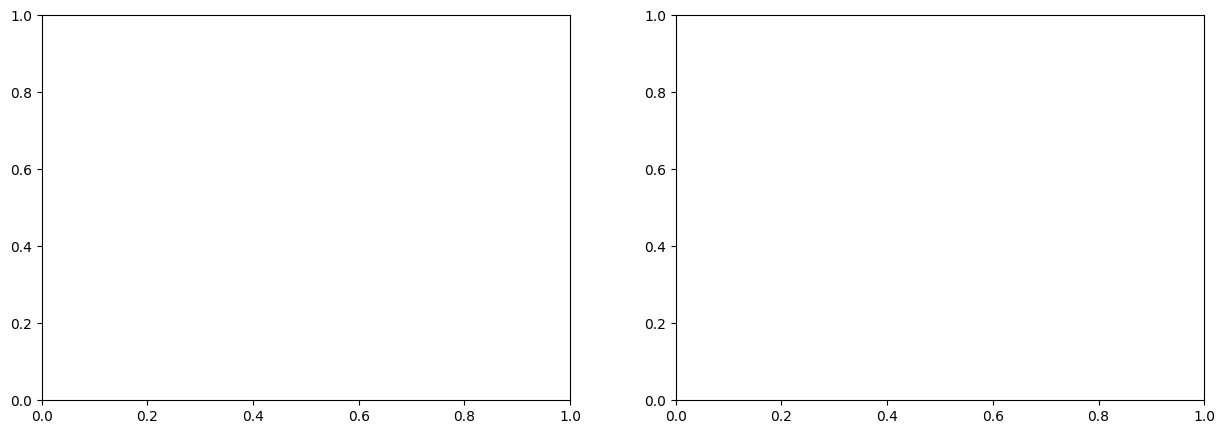

In [15]:
animate.create_animation(f'{filepath}chebyshev_sin_var_with_loss', spline_chebyshev, basis='chebyshev', shift_polynomial_centers='mean', plot_loss=True)

## Disposition Talk

In [7]:
polynum = 3
epochs = 500

In [8]:
spline_chebyshev = model.Spline(polydegree=7, polynum=3, ck=3, basis='chebyshev')
opt = keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)
spline_chebyshev.fit(xsinvar, ysinvar, optimizer=opt, n_epochs=epochs, factor_approximation_quality=0.9, factor_ck_pressure=0.1, record_coefficients=True, early_stopping=False)

<tf.Tensor: shape=(), dtype=float64, numpy=0.03247243839839394>

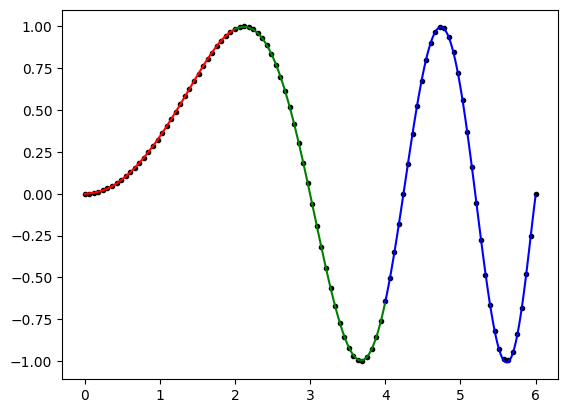

In [11]:
fig, ax = plt. subplots()
plot.plot_spline(spline_chebyshev, ax=ax)

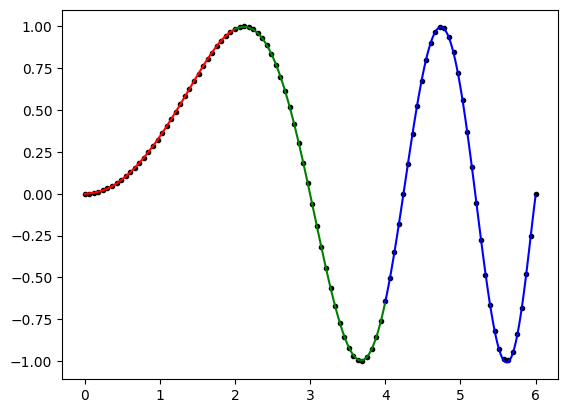

In [13]:
fig

In [15]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\experiments\\experiments-chebyshev-legendre\\exports\\plots\\3segpp.eps', format='eps', dpi=600, bbox_inches='tight')